# Using Traditional Aproach

In [1]:
import pandas as pd
import numpy as np
import cv2
import pytesseract
custom_config = r'— oem 3 — psm 6' 
from matplotlib import pyplot as plt


pytesseract.pytesseract.tesseract_cmd = r'D:\Work Station\Tesseract\tesseract.exe'

In [4]:
base_dir = "./Data/"

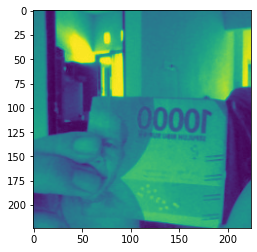

In [116]:
# load raw image
img = cv2.imread(base_dir+"10K-samples/95.jpg",0)

# display raw image
plt.imshow(img)
plt.show()

In [117]:
# Sharpen the Image

def sharpen_image(im):
  kernel = np.ones((3,3),np.float32)/90
  im = cv2.filter2D(im,-1,kernel)
  return im

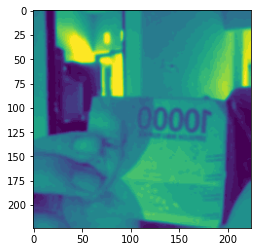

In [118]:
img = sharpen_image(cv2.imread(base_dir+"10K-samples/95.jpg",0))
# display sharpened image
plt.imshow(img)
plt.show()

seem better without sharpen :3

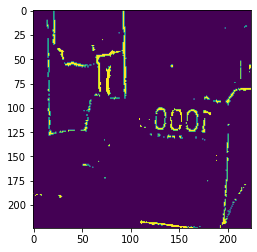

In [119]:
# apply image thresholding
img_thresh = cv2.adaptiveThreshold(img,    
          255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# invert the image, 255 is the maximum value
img_thresh = 255 - img_thresh
# display image
plt.imshow(img_thresh)
plt.show()

85.50284576416016


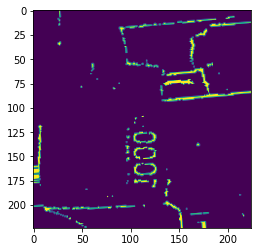

In [120]:
def align_text(im):
  coords = np.column_stack(np.where(img_thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  print(angle)
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  h,w = img.shape
  center = (w // 2, h // 2)
  
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img_thresh, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
# align image text
img = align_text(img)
# display rotated and aligned image
plt.imshow(img)
plt.show()

In [121]:
# split text into rows
# find sum of column values, row-wise
a = np.sum(img == 255, axis=1)
rows = []
seg = []
for i in range(len(a)):
  if a[i] > 0:
    seg.append(i)
  if (a[i] == 0) & (len(seg) >= 5):
    rows.append(seg)
    seg = []
  if len(seg) > 0:
    rows.append(seg)
# number of row segments
len(rows)

193

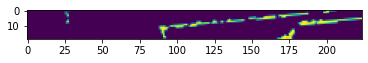

In [122]:
plt.imshow(img[rows[0][0]:rows[0][-1],:])
plt.show()

In [123]:
for i in range(len(rows)):
  a = pytesseract.image_to_string(img[rows[i][0]:rows[i][-1],:],config=custom_config,lang='ind')
  if len(a) > 0:
    print(a) 